In [66]:
#This script will take the pond data from the dataframes and present the info in usable manners
#
# The Pond_Info csv has columns below (each row is a new pond):
# ['site_name', 'status', 'site_id', 'latitude', 'longitude', 'Altitude (m)']
#
# The raw data csv's will have the column below.   Each row/entry is a specific days value.
# Site ID is correlated to each pond
# ['site_id', 'date', 'value', 'units', 'area_size_m', 'averaging_method', 'sweHybrid', 'melt', 'swe']

In [67]:
import csv
import matplotlib.pyplot as plt
import math
import datetime
import pandas as pd
from matplotlib.ticker import MaxNLocator

In [75]:
# Save locations for dataframes formatted in a good way
save_all_data_csv = "/Users/Cannon/Documents/School/UCSB/Briggs Lab/Thaw_Rate_Hypothesis/Raw Snow Melt Data (Bair et. Al) /Points_OF_Interest/DataFrame_CSV/dec_4_2023_all_melt.csv"
pond_meta_data_csv = "/Users/Cannon/Documents/School/UCSB/Briggs Lab/Thaw_Rate_Hypothesis/Raw Snow Melt Data (Bair et. Al) /Points_OF_Interest/DataFrame_CSV/dec_4_2023_pond_info.csv"


In [76]:
site_info = pd.read_csv(pond_meta_data_csv)
site_data = pd.read_csv(save_all_data_csv)

In [264]:
#Creates normalized melt
# Suppose that the total amount of melt is related to the total volume of snow.    More snow = more melt
# at any given condition.
#
# Now it is certainly more complicated than that but... we will do a simple normalization here to see if
# there is any merit to that concept.   I suspet there is some complicated relation and that a simple division
# is way oversimplifying it.   They both have the same
# units so the math is okay.  I am just not conviced it matches the actual relation between SWE and Melt.
#  I suspect it is non linear or somethign.... But we can explore that concept at detail later
site_data['normalized_melt'] = site_data['melt'] * (site_data['sweHybrid'] - site_data['sweHybrid'].min())/(site_data['sweHybrid'].max() - site_data['sweHybrid'].min())
site_data['normalized_melt'].fillna(0, inplace=True)

In [265]:
declining_sites = site_info[(site_info['status'] == 'Declining')] #& (df['Age'] > 30)
persistant_sites = site_info[(site_info['status'] == 'Persistent') & (site_info['status'] != 'persistent')]
naive_sites = site_info[(site_info['status'] == 'Naive')]
other_sites = site_info[(site_info['status'] != 'Naive') & (site_info['status'] != 'Persistent') &
                 (site_info['status'] != 'Declining') & (site_info['status'] != 'persistent')]

In [266]:
def create_simple_plot(data_frame, title):
    number_of_labels = 20
    max_val = 3500

    y_axis_label_values = range(0, int(round(max_val + 5, 2)), int(round(max_val/number_of_labels, 2)))
    
    max_melt_val = 80
    y_label_for_melt = range(0, int(round(max_melt_val + 5, 2)), int(round(max_melt_val/number_of_labels, 2)))
    
    
    grouped = data_frame.groupby('site_id')

    fig, axs = plt.subplots(3, 1, figsize=(20, 20))
    for site_id, group in grouped:
        axs[0].plot(group['date'], group['swe'], label=f'Site {site_id}')
        axs[1].plot(group['date'], group['sweHybrid'], label=f'Site {site_id}')
        axs[2].plot(group['date'], group['melt'], label=f'Site {site_id}')
        
    for ax in axs:
        ax.legend()
        ax.xaxis.set_major_locator(MaxNLocator(number_of_labels))
        
    plt.suptitle(title, fontsize=20, horizontalalignment='center', y = .92)
    axs[0].set_yticks(y_axis_label_values)
    axs[0].set_title("Swe (mm)")
    axs[1].set_yticks(y_axis_label_values)
    axs[1].set_title("sweHybrid (mm)")
    axs[2].set_yticks(y_label_for_melt)
    axs[2].set_title("melt (mm)")
    
    plt.show

In [267]:
declining_data = site_data[site_data['site_id'].isin(list(declining_sites['site_id']))]
persistant_data = site_data[site_data['site_id'].isin(list(persistant_sites['site_id']))]
naive_data = site_data[site_data['site_id'].isin(list(naive_sites['site_id']))]

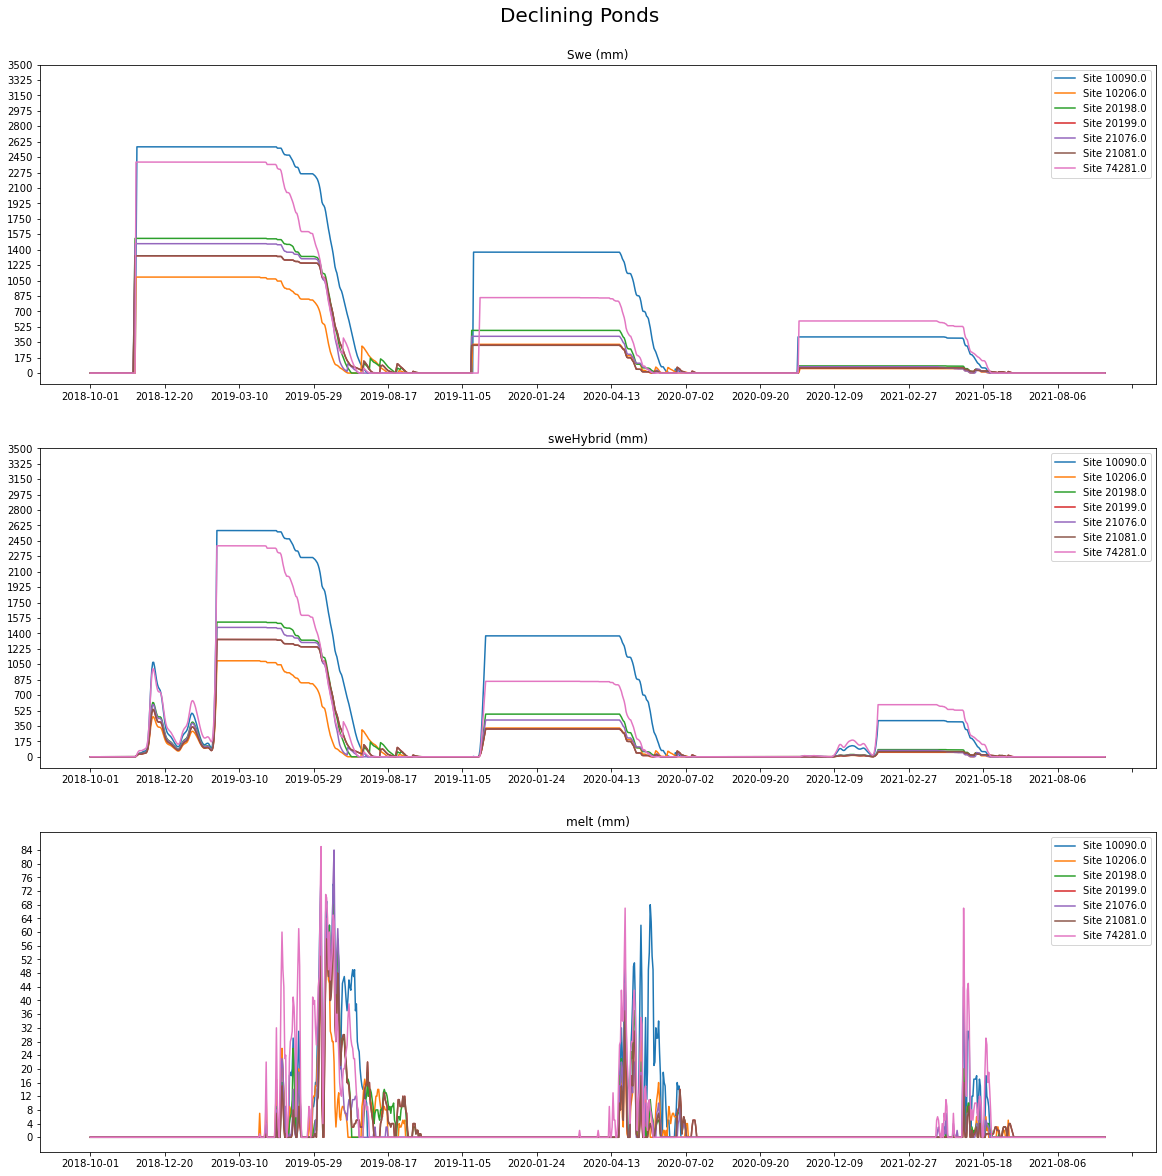

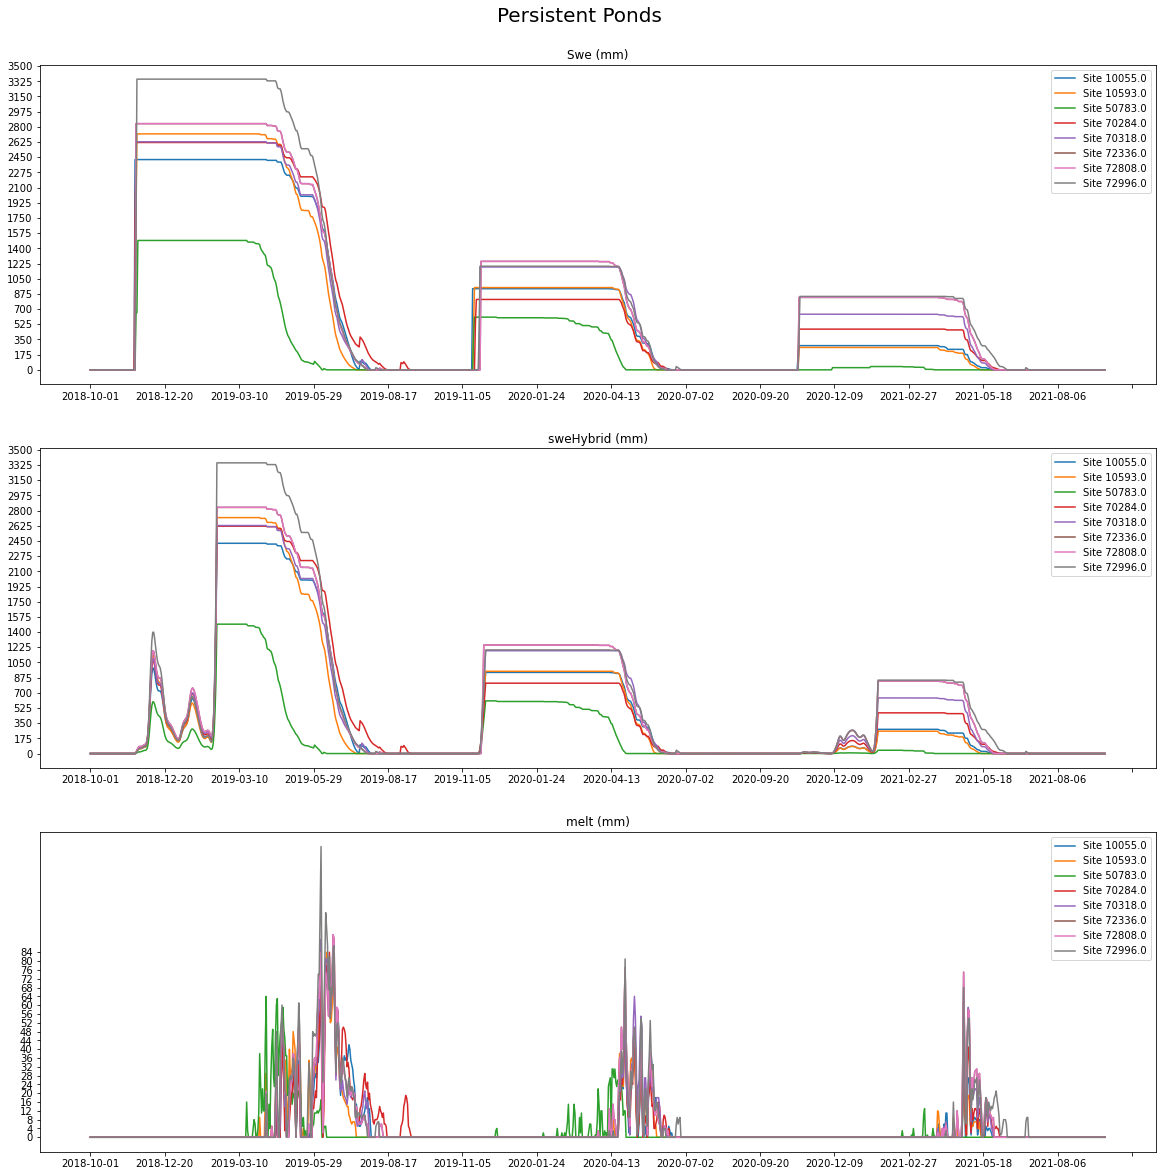

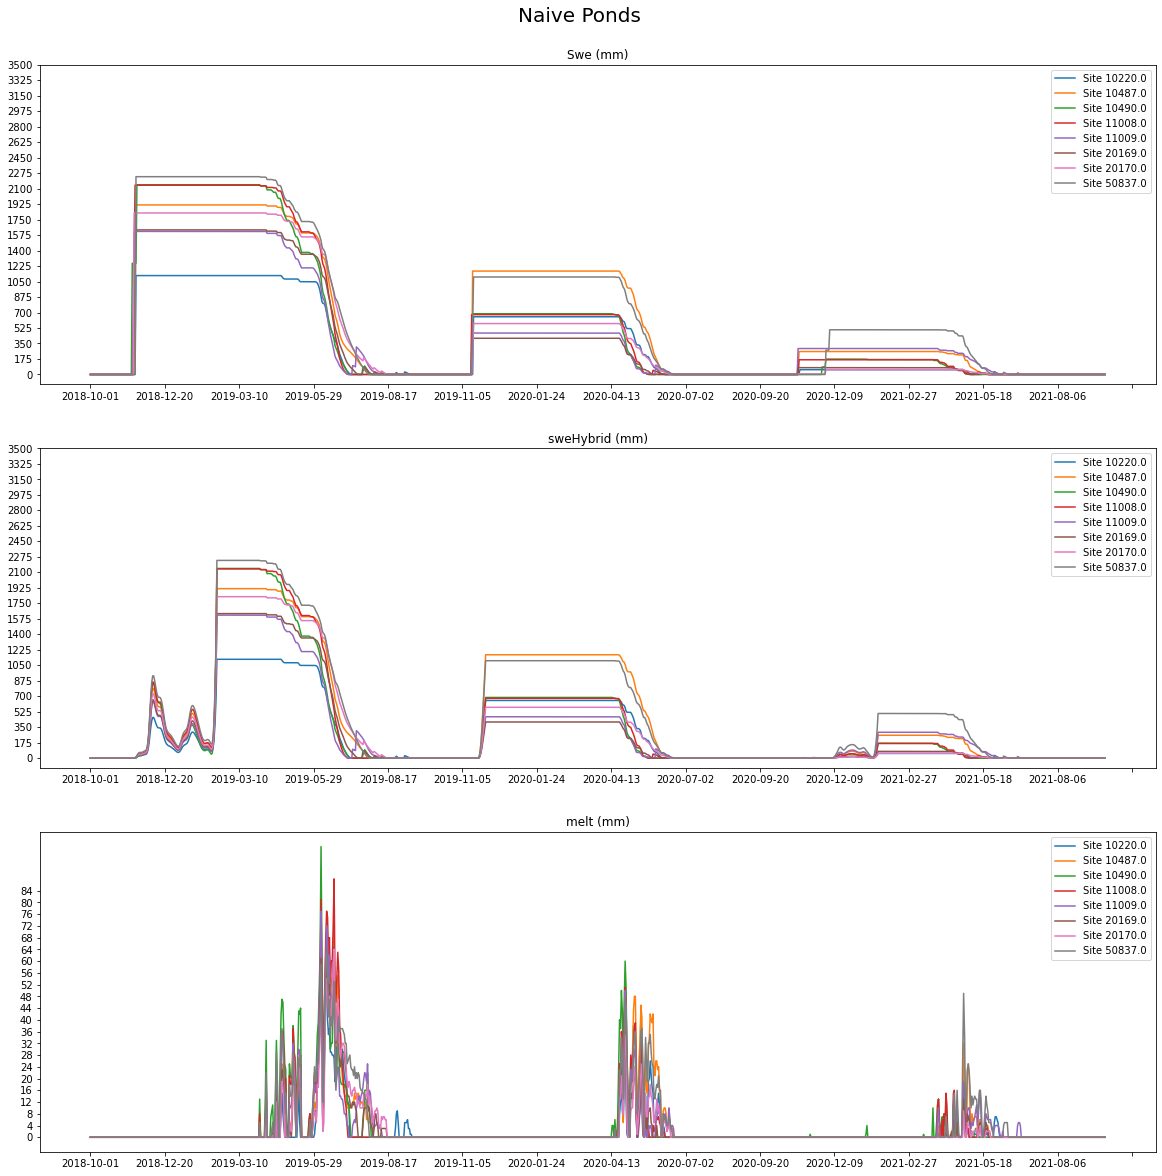

In [268]:
create_simple_plot(declining_data, 'Declining Ponds')
create_simple_plot(persistant_data, 'Persistent Ponds')
create_simple_plot(naive_data, 'Naive Ponds')

<function matplotlib.pyplot.show(close=None, block=None)>

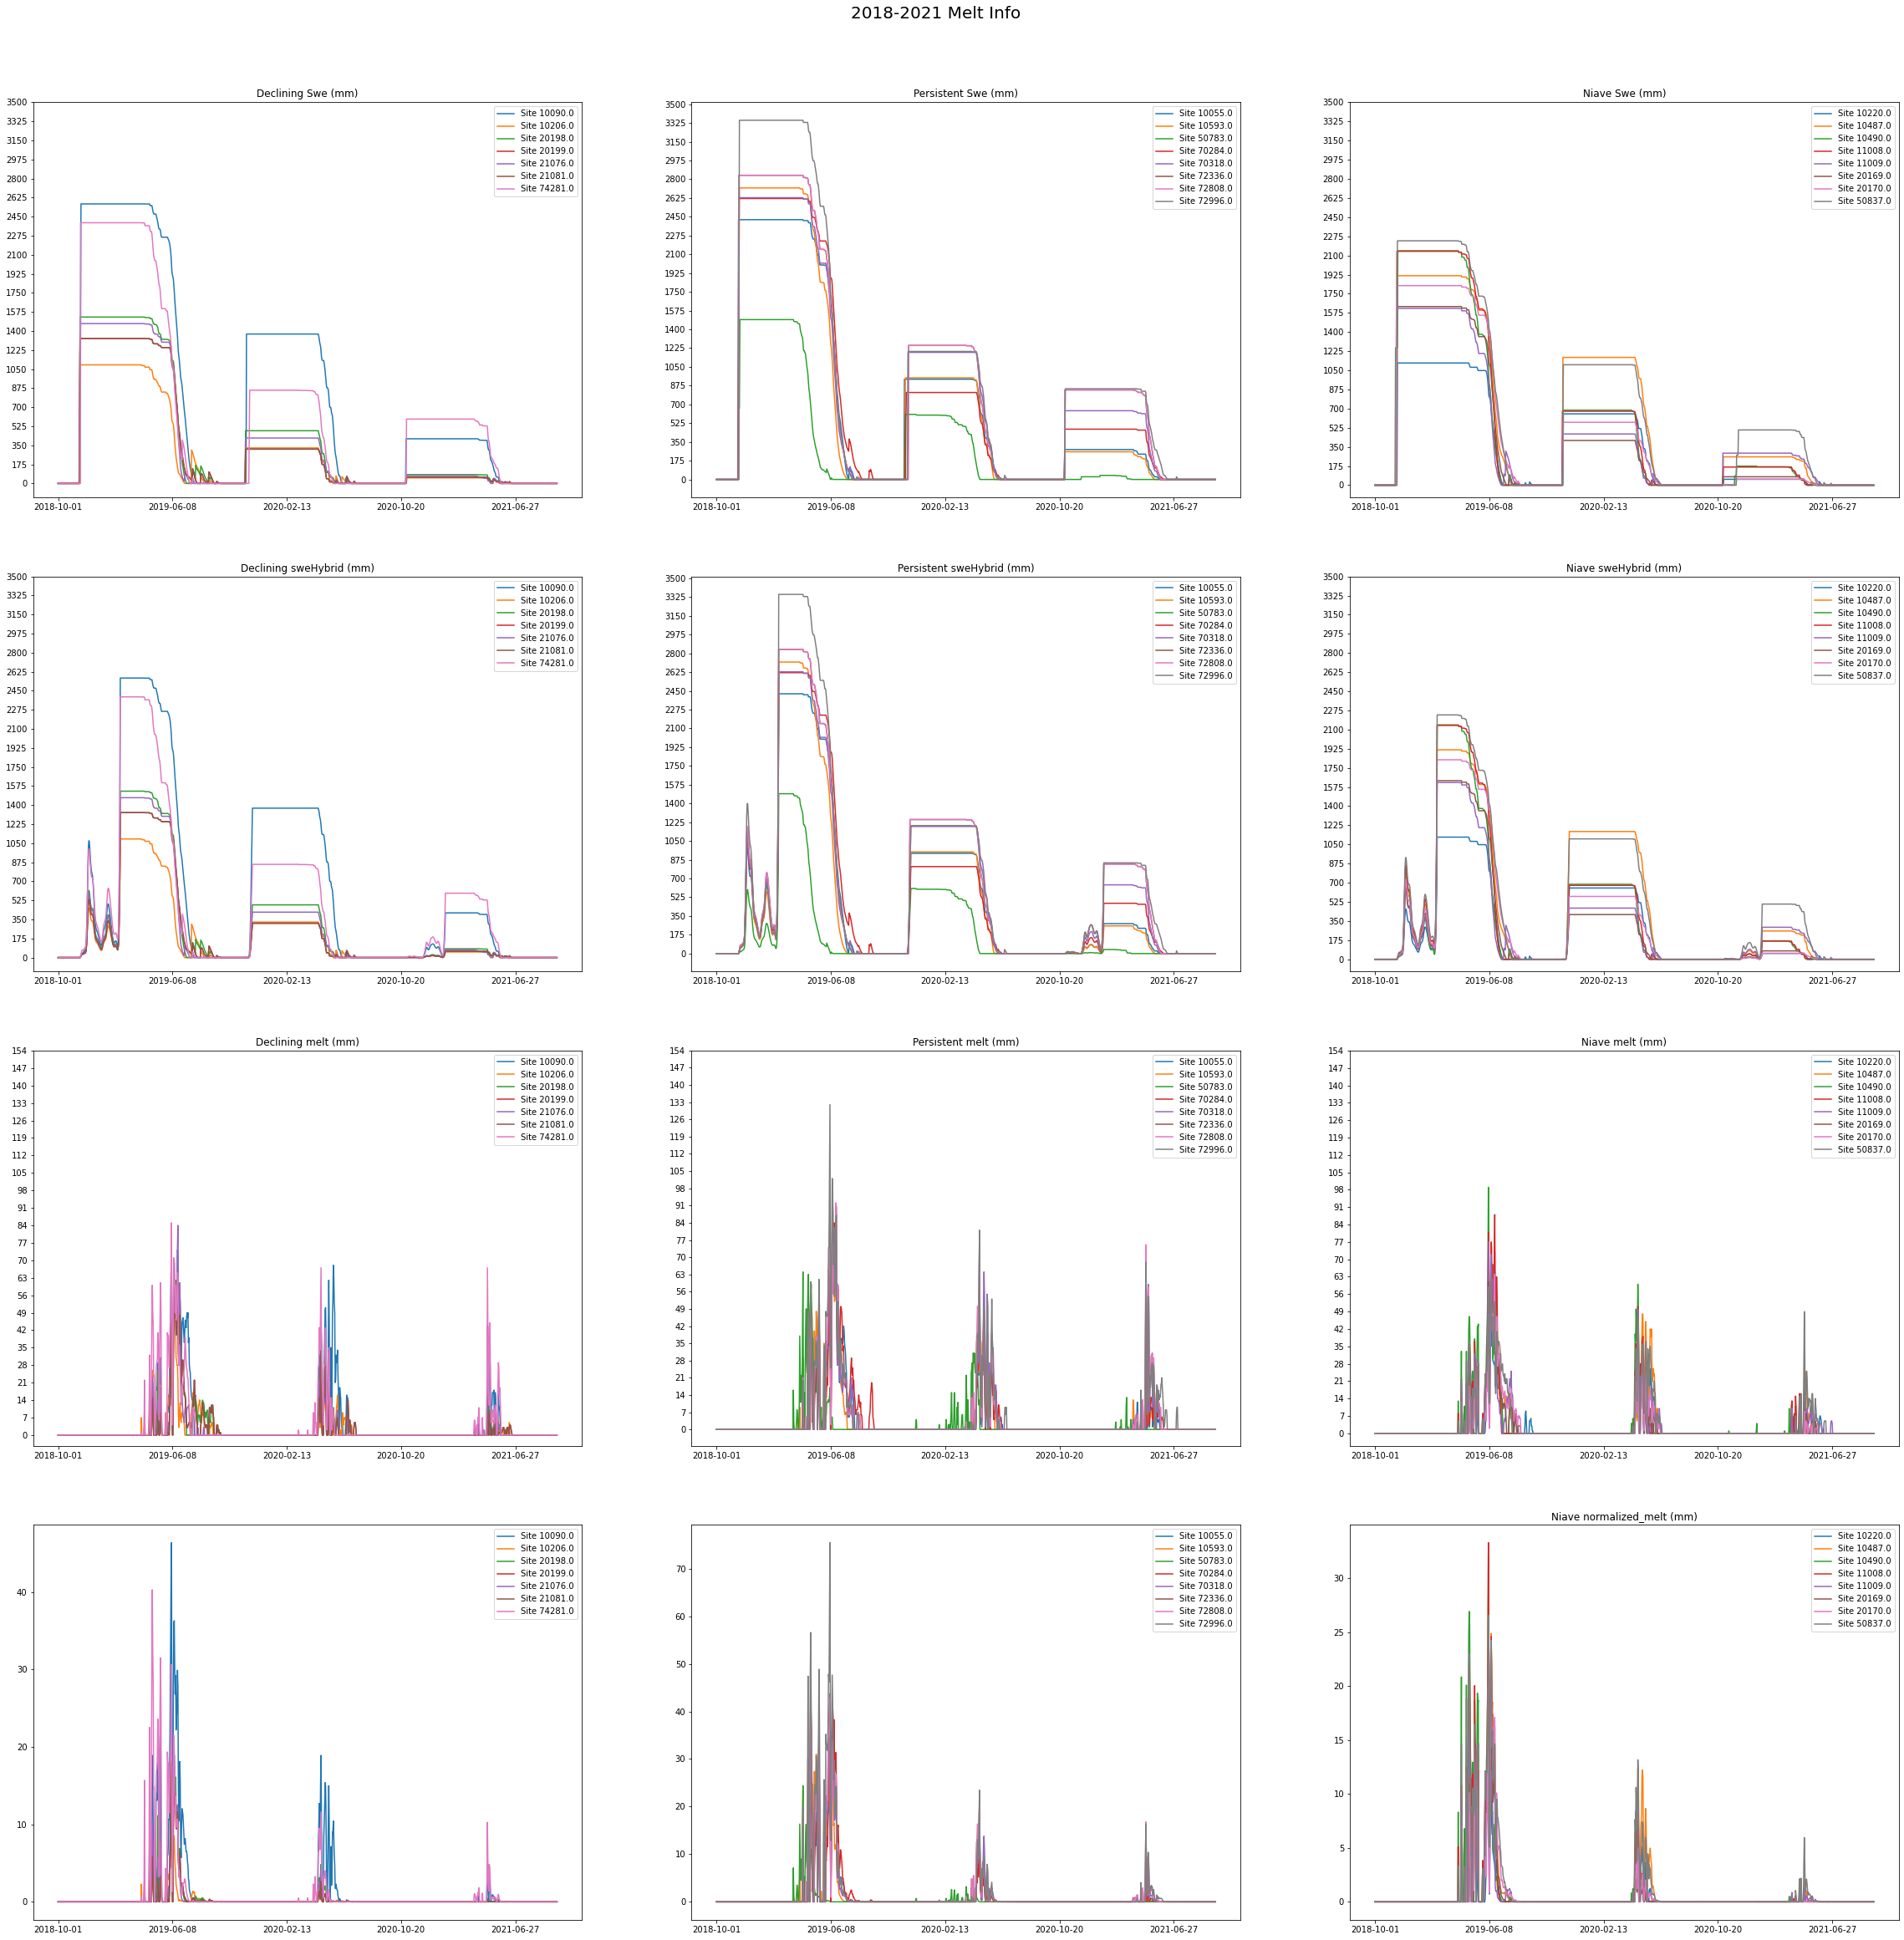

In [269]:
number_of_labels_x = 20
number_of_labels_y = 5
max_val = 3500

y_axis_label_values = range(0, int(round(max_val + 5, 2)), int(round(max_val/number_of_labels_x, 2)))
    
max_melt_val = 150
y_label_for_melt = range(0, int(round(max_melt_val + 5, 2)), int(round(max_melt_val/number_of_labels_x, 2)))
    
    
declining_grouped = declining_data.groupby('site_id')
persistent_grouped = persistant_data.groupby('site_id')
niave_grouped = naive_data.groupby('site_id')

fig, axs = plt.subplots(4, 3, figsize=(40, 40))
for site_id, group in declining_grouped:
    axs[0, 0].plot(group['date'], group['swe'], label=f'Site {site_id}')
    axs[1, 0].plot(group['date'], group['sweHybrid'], label=f'Site {site_id}')
    axs[2, 0].plot(group['date'], group['melt'], label=f'Site {site_id}')
    axs[3, 0].plot(group['date'], group['normalized_melt'], label=f'Site {site_id}')

for site_id, group in persistent_grouped:
    axs[0, 1].plot(group['date'], group['swe'], label=f'Site {site_id}')
    axs[1, 1].plot(group['date'], group['sweHybrid'], label=f'Site {site_id}')
    axs[2, 1].plot(group['date'], group['melt'], label=f'Site {site_id}')
    axs[3, 1].plot(group['date'], group['normalized_melt'], label=f'Site {site_id}')

for site_id, group in niave_grouped:
    axs[0, 2].plot(group['date'], group['swe'], label=f'Site {site_id}')
    axs[1, 2].plot(group['date'], group['sweHybrid'], label=f'Site {site_id}')
    axs[2, 2].plot(group['date'], group['melt'], label=f'Site {site_id}')
    axs[3, 2].plot(group['date'], group['normalized_melt'], label=f'Site {site_id}')
        
for j in axs:
    for ax in j:
        ax.legend()
        ax.xaxis.set_major_locator(MaxNLocator(number_of_labels_y))
        
plt.suptitle('2018-2021 Melt Info', fontsize=20, horizontalalignment='center', y = .92)
axs[0, 0].set_yticks(y_axis_label_values)
axs[0, 0].set_title("Declining Swe (mm)")
axs[1, 0].set_yticks(y_axis_label_values)
axs[1, 0].set_title("Declining sweHybrid (mm)")
axs[2, 0].set_yticks(y_label_for_melt)
axs[2, 0].set_title("Declining melt (mm)")
axs[3, 2].set_title("Persistent normalized_melt (mm)")

axs[0, 1].set_yticks(y_axis_label_values)
axs[0, 1].set_title("Persistent Swe (mm)")
axs[1, 1].set_yticks(y_axis_label_values)
axs[1, 1].set_title("Persistent sweHybrid (mm)")
axs[2, 1].set_yticks(y_label_for_melt)
axs[2, 1].set_title("Persistent melt (mm)")
axs[3, 2].set_title("Persistent normalized_melt (mm)")

axs[0, 2].set_yticks(y_axis_label_values)
axs[0, 2].set_title("Niave Swe (mm)")
axs[1, 2].set_yticks(y_axis_label_values)
axs[1, 2].set_title("Niave sweHybrid (mm)")
axs[2, 2].set_yticks(y_label_for_melt)
axs[2, 2].set_title("Niave melt (mm)")
axs[3, 2].set_title("Niave normalized_melt (mm)")


    
plt.show

In [272]:
daily_average_decline_df_swe = declining_data.groupby('date')['swe'].mean().reset_index()
daily_average_persistant_df_swe = persistant_data.groupby('date')['swe'].mean().reset_index()
daily_average_naive_df_swe = naive_data.groupby('date')['swe'].mean().reset_index()

daily_average_decline_df_sweHybrid = declining_data.groupby('date')['sweHybrid'].mean().reset_index()
daily_average_persistant_df_sweHybrid = persistant_data.groupby('date')['sweHybrid'].mean().reset_index()
daily_average_naive_df_sweHybrid = naive_data.groupby('date')['sweHybrid'].mean().reset_index()

daily_average_decline_df_melt = declining_data.groupby('date')['melt'].mean().reset_index()
daily_average_persistant_df_melt = persistant_data.groupby('date')['melt'].mean().reset_index()
daily_average_naive_df_melt = naive_data.groupby('date')['melt'].mean().reset_index()

daily_average_decline_df_norm_melt = declining_data.groupby('date')['normalized_melt'].mean().reset_index()
daily_average_persistant_df_norm_melt = persistant_data.groupby('date')['normalized_melt'].mean().reset_index()
daily_average_naive_df_norm_melt = naive_data.groupby('date')['normalized_melt'].mean().reset_index()

In [278]:
# all_data = pd.merge(daily_average_decline_df_swe,
#                     daily_average_persistant_df_swe, 
#                     on=["date"], suffixes=('', '_df2'))
all_average_data = pd.merge(daily_average_decline_df_swe, 
                    daily_average_persistant_df_swe,
                    on=["date"],
                    suffixes=('_decline', '_persistent'))

#I think this will add the column name as just SWE so we will need to correct that later
all_average_data = pd.merge(all_average_data, 
                    daily_average_naive_df_swe,
                    on=["date"],
                    suffixes=('', '_naive'))

#I think this will add the column name as just SWE so we will need to correct that later
all_average_data = pd.merge(all_average_data,
                    daily_average_decline_df_sweHybrid,
                    on=["date"],
                    suffixes=('', '_decline'))

all_average_data = pd.merge(all_average_data, 
                    daily_average_persistant_df_sweHybrid,
                    on=["date"],
                    suffixes=('', '_persistent'))

all_average_data = pd.merge(all_average_data, 
                    daily_average_naive_df_sweHybrid,
                    on=["date"],
                    suffixes=('', '_naive'))

#I think this will add the column name as just SWE so we will need to correct that later
all_average_data = pd.merge(all_average_data,
                    daily_average_decline_df_melt,
                    on=["date"],
                    suffixes=('', '_decline'))

all_average_data = pd.merge(all_average_data, 
                    daily_average_persistant_df_melt,
                    on=["date"],
                    suffixes=('', '_persistent'))

all_average_data = pd.merge(all_average_data, 
                    daily_average_naive_df_melt,
                    on=["date"],
                    suffixes=('', '_naive'))

#I think this will add the column name as just SWE so we will need to correct that later
all_average_data = pd.merge(all_average_data,
                    daily_average_decline_df_norm_melt,
                    on=["date"],
                    suffixes=('', '_decline'))

all_average_data = pd.merge(all_average_data, 
                    daily_average_persistant_df_norm_melt,
                    on=["date"],
                    suffixes=('', '_persistent'))

all_average_data = pd.merge(all_average_data, 
                    daily_average_naive_df_norm_melt,
                    on=["date"],
                    suffixes=('', '_naive'))
# daily_average = pd.merge(daily_average,
#                          daily_average_decline_df_melt,
#                          daily_average_persistant_df_melt,
#                          daily_average_naive_df_melt,
#                          on='date',
#                          suffixes=('', '_persistent', '_decline', '_naive'))
all_average_data = all_average_data.rename(columns={'swe': 'swe_naive'})
all_average_data = all_average_data.rename(columns={'sweHybrid': 'sweHybrid_decline'})
all_average_data = all_average_data.rename(columns={'melt': 'melt_decline'})
all_average_data = all_average_data.rename(columns={'normalized_melt': 'normalized_melt_decline'})

In [279]:
all_average_data

,date,swe_decline,swe_persistent,swe_naive,sweHybrid_decline,sweHybrid_persistent,sweHybrid_naive,melt_decline,melt_persistent,melt_naive,normalized_melt_decline,normalized_melt_persistent,normalized_melt_naive
0,2018-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-10-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-10-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-10-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,2021-09-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1088,2021-09-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1089,2021-09-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1090,2021-09-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

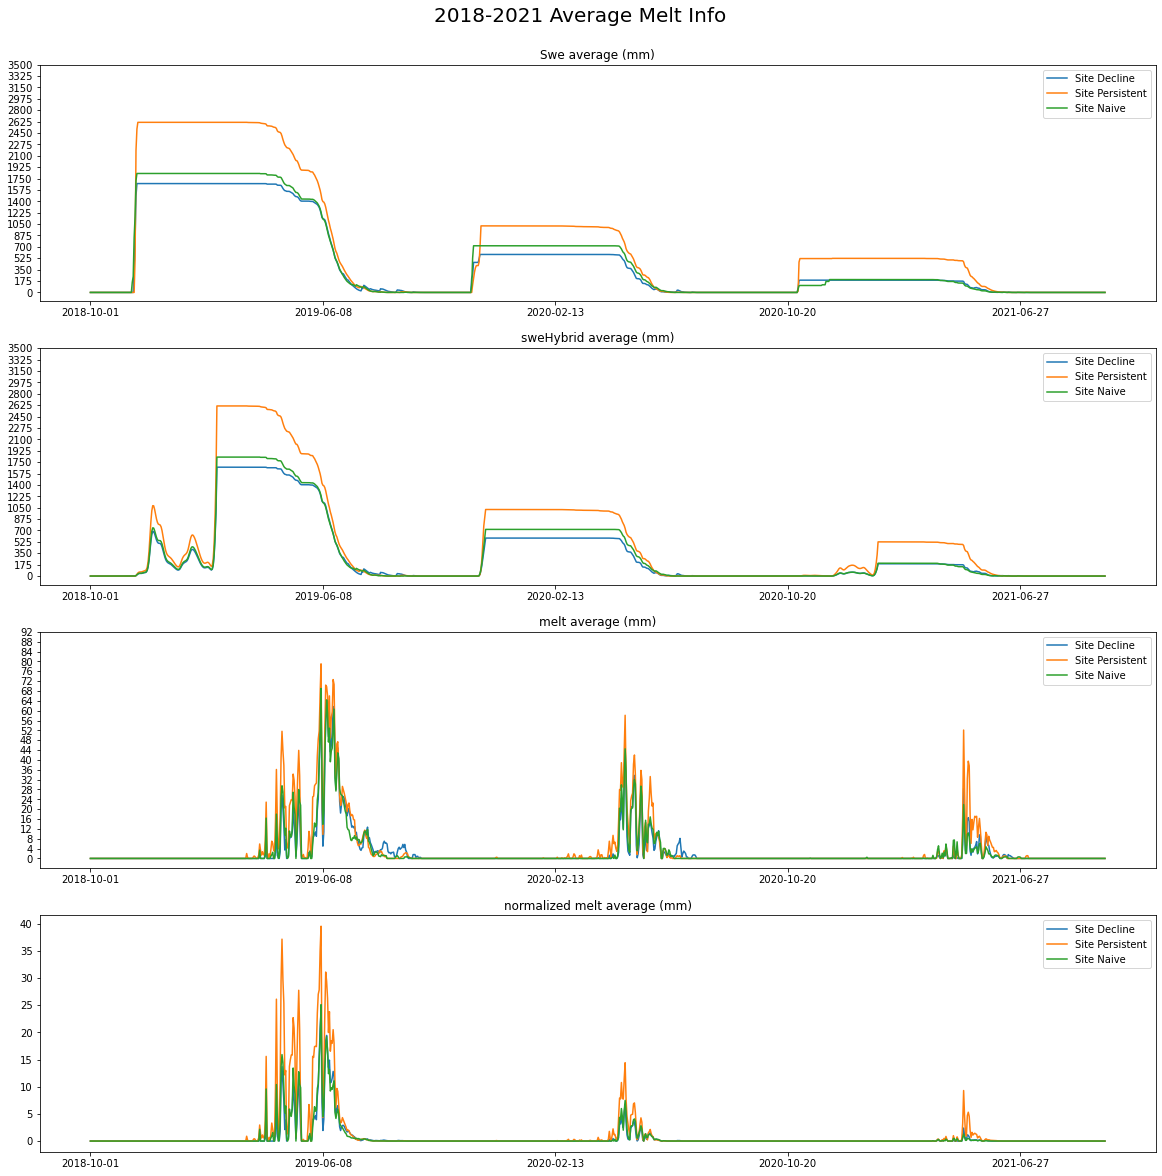

In [281]:
#This doesnt use the all_average_data dataframe.   It should be the same data but a little less effecient.
number_of_labels_x = 20
number_of_labels_y = 5
max_val = 3500

y_axis_label_values = range(0, int(round(max_val + 5, 2)), int(round(max_val/number_of_labels_x, 2)))
    
max_melt_val = 90
y_label_for_melt = range(0, int(round(max_melt_val + 5, 2)), int(round(max_melt_val/number_of_labels_x, 2)))
    

fig, axs = plt.subplots(4, 1, figsize=(20, 20))
axs[0].plot(daily_average_decline_df_swe['date'], 
            daily_average_decline_df_swe['swe'], label=f'Site Decline')
axs[0].plot(daily_average_persistant_df_swe['date'], 
            daily_average_persistant_df_swe['swe'], label=f'Site Persistent')
axs[0].plot(daily_average_naive_df_swe['date'], 
            daily_average_naive_df_swe['swe'], label=f'Site Naive')

axs[1].plot(daily_average_decline_df_sweHybrid['date'], 
            daily_average_decline_df_sweHybrid['sweHybrid'], label=f'Site Decline')
axs[1].plot(daily_average_persistant_df_sweHybrid['date'], 
            daily_average_persistant_df_sweHybrid['sweHybrid'], label=f'Site Persistent')
axs[1].plot(daily_average_naive_df_sweHybrid['date'], 
            daily_average_naive_df_sweHybrid['sweHybrid'], label=f'Site Naive')

axs[2].plot(daily_average_decline_df_melt['date'], 
            daily_average_decline_df_melt['melt'], label=f'Site Decline')
axs[2].plot(daily_average_persistant_df_melt['date'], 
            daily_average_persistant_df_melt['melt'], label=f'Site Persistent')
axs[2].plot(daily_average_naive_df_melt['date'], 
            daily_average_naive_df_melt['melt'], label=f'Site Naive')

axs[3].plot(daily_average_decline_df_norm_melt['date'], 
            daily_average_decline_df_norm_melt['normalized_melt'], label=f'Site Decline')
axs[3].plot(daily_average_persistant_df_norm_melt['date'], 
            daily_average_persistant_df_norm_melt['normalized_melt'], label=f'Site Persistent')
axs[3].plot(daily_average_naive_df_norm_melt['date'], 
            daily_average_naive_df_norm_melt['normalized_melt'], label=f'Site Naive')


for ax in axs:
    ax.legend()
    ax.xaxis.set_major_locator(MaxNLocator(number_of_labels_y))

plt.suptitle('2018-2021 Average Melt Info', fontsize=20, horizontalalignment='center', y = .92)
axs[0].set_yticks(y_axis_label_values)
axs[0].set_title("Swe average (mm)")
axs[1].set_yticks(y_axis_label_values)
axs[1].set_title("sweHybrid average (mm)")
axs[2].set_yticks(y_label_for_melt)
axs[2].set_title("melt average (mm)")
axs[3].set_title("normalized melt average (mm)")

 
plt.show 

In [282]:


# all_average_data 
# date	swe_decline	swe_persistent	swe_naive	sweHybrid_decline	sweHybrid_persistent	
# sweHybrid_naive	melt_decline	melt_persistent	melt_naive
all_average_data['swe_p_d_diff'] = all_average_data['swe_persistent'] - all_average_data['swe_decline']
all_average_data['swe_p_n_diff'] = all_average_data['swe_persistent'] - all_average_data['swe_naive']

all_average_data['sweHyb_p_d_diff'] = all_average_data['sweHybrid_persistent'] - all_average_data['sweHybrid_decline']
all_average_data['sweHyb_p_n_diff'] = all_average_data['sweHybrid_persistent'] - all_average_data['sweHybrid_naive']

all_average_data['melt_p_d_diff'] = all_average_data['melt_persistent'] - all_average_data['melt_decline']
all_average_data['melt_p_n_diff'] = all_average_data['melt_persistent'] - all_average_data['melt_naive']

all_average_data['norm_melt_p_d_diff'] = all_average_data['normalized_melt_persistent'] - all_average_data['normalized_melt_decline']
all_average_data['norm_melt_p_n_diff'] = all_average_data['normalized_melt_persistent'] - all_average_data['normalized_melt_naive']


<function matplotlib.pyplot.show(close=None, block=None)>

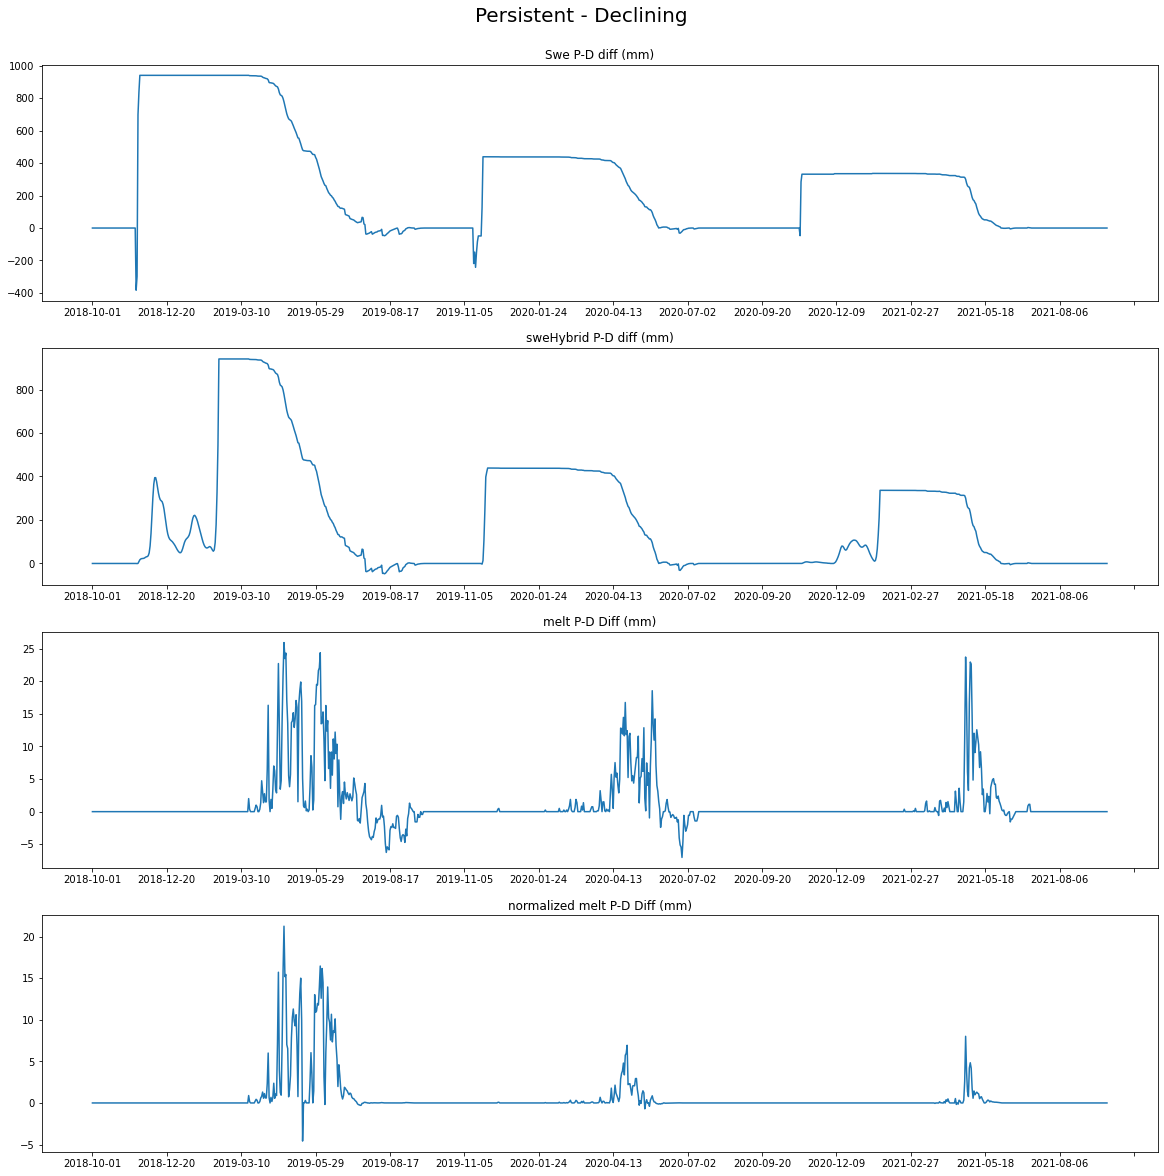

In [283]:
    number_of_labels = 20
    max_val = 3500

    y_axis_label_values = range(0, int(round(max_val + 5, 2)), int(round(max_val/number_of_labels, 2)))
    
    max_melt_val = 80
    y_label_for_melt = range(0, int(round(max_melt_val + 5, 2)), int(round(max_melt_val/number_of_labels, 2)))
    

    fig, axs = plt.subplots(4, 1, figsize=(20, 20))
    
    axs[0].plot(all_average_data['date'], all_average_data['swe_p_d_diff'])
    axs[1].plot(all_average_data['date'], all_average_data['sweHyb_p_d_diff'])
    axs[2].plot(all_average_data['date'], all_average_data['melt_p_d_diff'])
    axs[3].plot(all_average_data['date'], all_average_data['norm_melt_p_n_diff'])
        
    for ax in axs:
        ax.xaxis.set_major_locator(MaxNLocator(number_of_labels))
        
    plt.suptitle('Persistent - Declining', fontsize=20, horizontalalignment='center', y = .92)
    #axs[0].set_yticks(y_axis_label_values)
    axs[0].set_title("Swe P-D diff (mm)")
    #axs[1].set_yticks(y_axis_label_values)
    axs[1].set_title("sweHybrid P-D diff (mm)")
    #axs[2].set_yticks(y_label_for_melt)
    axs[2].set_title("melt P-D Diff (mm)")
    axs[3].set_title("normalized melt P-D Diff (mm)")
    
    plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

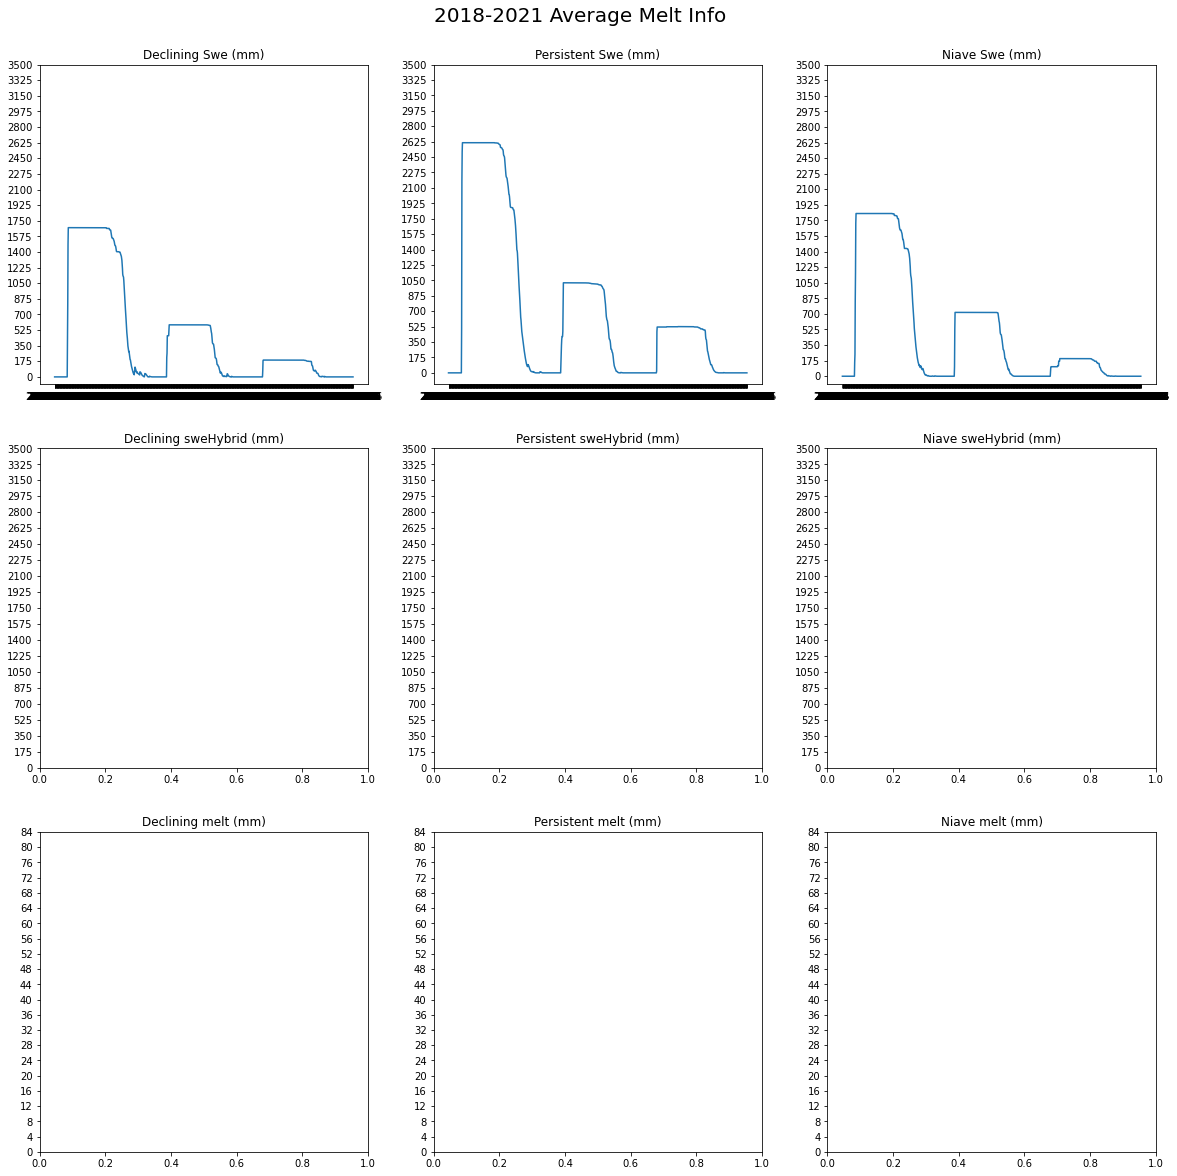

In [177]:
number_of_labels = 20
max_val = 3500

y_axis_label_values = range(0, int(round(max_val + 5, 2)), int(round(max_val/number_of_labels, 2)))
    
max_melt_val = 80
y_label_for_melt = range(0, int(round(max_melt_val + 5, 2)), int(round(max_melt_val/number_of_labels, 2)))
    

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
axs[0, 0].plot(daily_average_decline_df_swe['date'], daily_average_decline_df_swe['swe'], label=f'Site {site_id}')
axs[0, 1].plot(daily_average_persistant_df_swe['date'], daily_average_persistant_df_swe['swe'], label=f'Site {site_id}')
axs[0, 2].plot(daily_average_naive_df_swe['date'], daily_average_naive_df_swe['swe'], label=f'Site {site_id}')
        
plt.suptitle('2018-2021 Average Melt Info', fontsize=20, horizontalalignment='center', y = .92)
axs[0, 0].set_yticks(y_axis_label_values)
axs[0, 0].set_title("Declining Swe (mm)")
axs[1, 0].set_yticks(y_axis_label_values)
axs[1, 0].set_title("Declining sweHybrid (mm)")
axs[2, 0].set_yticks(y_label_for_melt)
axs[2, 0].set_title("Declining melt (mm)")

axs[0, 1].set_yticks(y_axis_label_values)
axs[0, 1].set_title("Persistent Swe (mm)")
axs[1, 1].set_yticks(y_axis_label_values)
axs[1, 1].set_title("Persistent sweHybrid (mm)")
axs[2, 1].set_yticks(y_label_for_melt)
axs[2, 1].set_title("Persistent melt (mm)")

axs[0, 2].set_yticks(y_axis_label_values)
axs[0, 2].set_title("Niave Swe (mm)")
axs[1, 2].set_yticks(y_axis_label_values)
axs[1, 2].set_title("Niave sweHybrid (mm)")
axs[2, 2].set_yticks(y_label_for_melt)
axs[2, 2].set_title("Niave melt (mm)")

for ax in axs:
    ax.legend()
    ax.xaxis.set_major_locator(MaxNLocator(number_of_labels_y))
    
plt.show 

In [ ]:
number_of_labels = 20
max_val = 3500
y_axis_label_values = range(0, int(round(max_val + 5, 2)), int(round(max_val/number_of_labels, 2)))

plt.figure(figsize =(20,20))
#plt.plot(dates, pond_data[17])
for pond in pond_data:
    plt.plot(dates, pond)
plt.yticks(y_axis_label_values)
plt.show